<a href="https://colab.research.google.com/github/Defenderest/EMPI_LAB/blob/main/%D0%9F%D0%B0%D1%86%D0%B5%D1%80%D0%B0_%D0%86%D0%B3%D0%BE%D1%80_6_1213_2(2)_%D0%9B%D0%B0%D0%B1%D0%BE%D1%80%D0%B0%D1%82%D0%BE%D1%80%D0%BD%D0%B0_%E2%84%964_%D0%95%D0%9C%D0%9F%D0%86.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота № 4
Дисципліна «Емпіричні методи програмної інженерії»

Лабораторна робота № 4 : «Пакети Python для обробки даних.
Візуалізація даних та побудова графіків»

Виконав: студент гр. 6.1213-2 (2)

Пацера Ігор Євгенійович

Перевірила: Викладач

Столярова Анастасія Валеріївна

#Інсталюванння пакетів

In [1]:
!pip install pycodestyle
!pip install --index-url https://test.pypi.org/simple/ nbpep8

Looking in indexes: https://test.pypi.org/simple/


#Додавання бібліотек


In [9]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from nbpep8.nbpep8 import pep8

#Завдання №1
Створив масив ndarray та заповнив його випадковими числами.
Для створеного масива розрахував середнє арифметичне, середнє
геометричне, моду, медіану.


In [11]:
arr = np.random.randint(1, 101, size=10)
print(arr)
mean_arithmetic = np.mean(arr)
mean_geometric = stats.gmean(arr)
mode = stats.mode(arr)[0]
median = np.median(arr)
print(f"Середнє арифметичне: {mean_arithmetic}")
print(f"Середнє геометричне: {mean_geometric}")
print(f"Мода: {mode}")
print(f"Медіана: {median}")
pep8(_ih)

[37 73 20 18  6 87 13 84 74 26]
Середнє арифметичне: 43.8
Середнє геометричне: 31.826767342945246
Мода: 6
Медіана: 31.5



#Завдання №2
Створив структуру DataFrame та заповнив його випадковими
числами строковими даними (наприклад, турнірна таблиця). Виконав
фільтрацію даних за довільними признаками.

In [15]:
n_teams = 4
teams = [f'Team {i+1}' for i in range(n_teams)]
games = np.full(n_teams, 15)
wins = np.random.randint(0, 16, size=n_teams)
draws = np.random.randint(0, np.minimum(games - wins + 1, 16), size=n_teams)
losses = games - wins - draws
points = wins * 3 + draws
data = {
    'Команда': teams,
    'Ігри': games,
    'Перемоги': wins,
    'Нічиї': draws,
    'Поразки': losses,
    'Очки': points
}
df = pd.DataFrame(data)
df = df.sort_values('Очки', ascending=False)
print("Турнірна таблиця:")
print(df)
print("\nКоманди з більше ніж 20 очками:")
filtered_by_points = df[df['Очки'] > 20]
print(filtered_by_points)
print("\nКоманди з більше ніж 5 перемогами:")
filtered_by_wins = df[df['Перемоги'] > 5]
print(filtered_by_wins)
print("\nКоманди з менше ніж 5 поразками:")
filtered_by_losses = df[df['Поразки'] < 5]
print(filtered_by_losses)
print("\nСтатистика турнірної таблиці:")
print(f"Середня кількість очок: {df['Очки'].mean():.2f}")
print(f"Максимальна кількість очок: {df['Очки'].max()}")
print(f"Мінімальна кількість очок: {df['Очки'].min()}")
print(f"Всього забито очок: {df['Очки'].sum()}")
pep8(_ih)

Турнірна таблиця:
  Команда  Ігри  Перемоги  Нічиї  Поразки  Очки
3  Team 4    15        15      0        0    45
0  Team 1    15         7      7        1    28
2  Team 3    15         7      3        5    24
1  Team 2    15         2      1       12     7

Команди з більше ніж 20 очками:
  Команда  Ігри  Перемоги  Нічиї  Поразки  Очки
3  Team 4    15        15      0        0    45
0  Team 1    15         7      7        1    28
2  Team 3    15         7      3        5    24

Команди з більше ніж 5 перемогами:
  Команда  Ігри  Перемоги  Нічиї  Поразки  Очки
3  Team 4    15        15      0        0    45
0  Team 1    15         7      7        1    28
2  Team 3    15         7      3        5    24

Команди з менше ніж 5 поразками:
  Команда  Ігри  Перемоги  Нічиї  Поразки  Очки
3  Team 4    15        15      0        0    45
0  Team 1    15         7      7        1    28

Статистика турнірної таблиці:
Середня кількість очок: 26.00
Максимальна кількість очок: 45
Мінімальна кількіст

#Завдання №3
Створив дві структури Series та заповнив їх випадковими числами
з пропусками у довільних місцях. Виконав переадресацію з заповненням
пропусків.


In [21]:
s1 = pd.Series([random.randint(1, 10) if random.random()
               > 0.3 else np.nan for _ in range(6)],
               index=['a', 'b', 'c', 'd', 'e', 'f'])
s2 = pd.Series([random.randint(1, 10) if random.random()
               > 0.3 else np.nan for _ in range(6)],
               index=['a', 'b', 'c', 'd', 'e', 'f'])
print("Series 1:")
print(s1)
print("\nSeries 2:")
print(s2)
s1_filled = s1.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g'], method='ffill')
s2_filled = s2.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g'], method='bfill')
print("\nSeries 1 після заповнення:")
print(s1_filled)
print("\nSeries 2 після заповнення:")
print(s2_filled)
pep8(_ih)

Series 1:
a     4.0
b     5.0
c     6.0
d     8.0
e     NaN
f    10.0
dtype: float64

Series 2:
a    1.0
b    5.0
c    NaN
d    2.0
e    6.0
f    NaN
dtype: float64

Series 1 після заповнення:
a     4.0
b     5.0
c     6.0
d     8.0
e     NaN
f    10.0
g    10.0
dtype: float64

Series 2 після заповнення:
a    1.0
b    5.0
c    NaN
d    2.0
e    6.0
f    NaN
g    NaN
dtype: float64



#Завдання №4
Використовувати набір даних California Housing (from
sklearn.datasets import fetch_california_housing) побудувавтакі
діаграми:
- Побудував гістограму кожного з атрибутів набору даних.
- Додав новий атрибут 'TXPRM' який розраховується як відношення
атрибутів 'MedInc' та 'AveRooms'.
- Додав новий атрибут 'TXLSTAT' який розраховується як відношення
атрибутів 'MedIn' та 'Population'
- Побудував 3D діаграми розсіювання між атрибутами 'TXPRM' та
'MedHouseVal'; 'TXLSTAT' та ' MedHouseVal '. Запропонував атрибути
для вісі Z та позначення кольором.

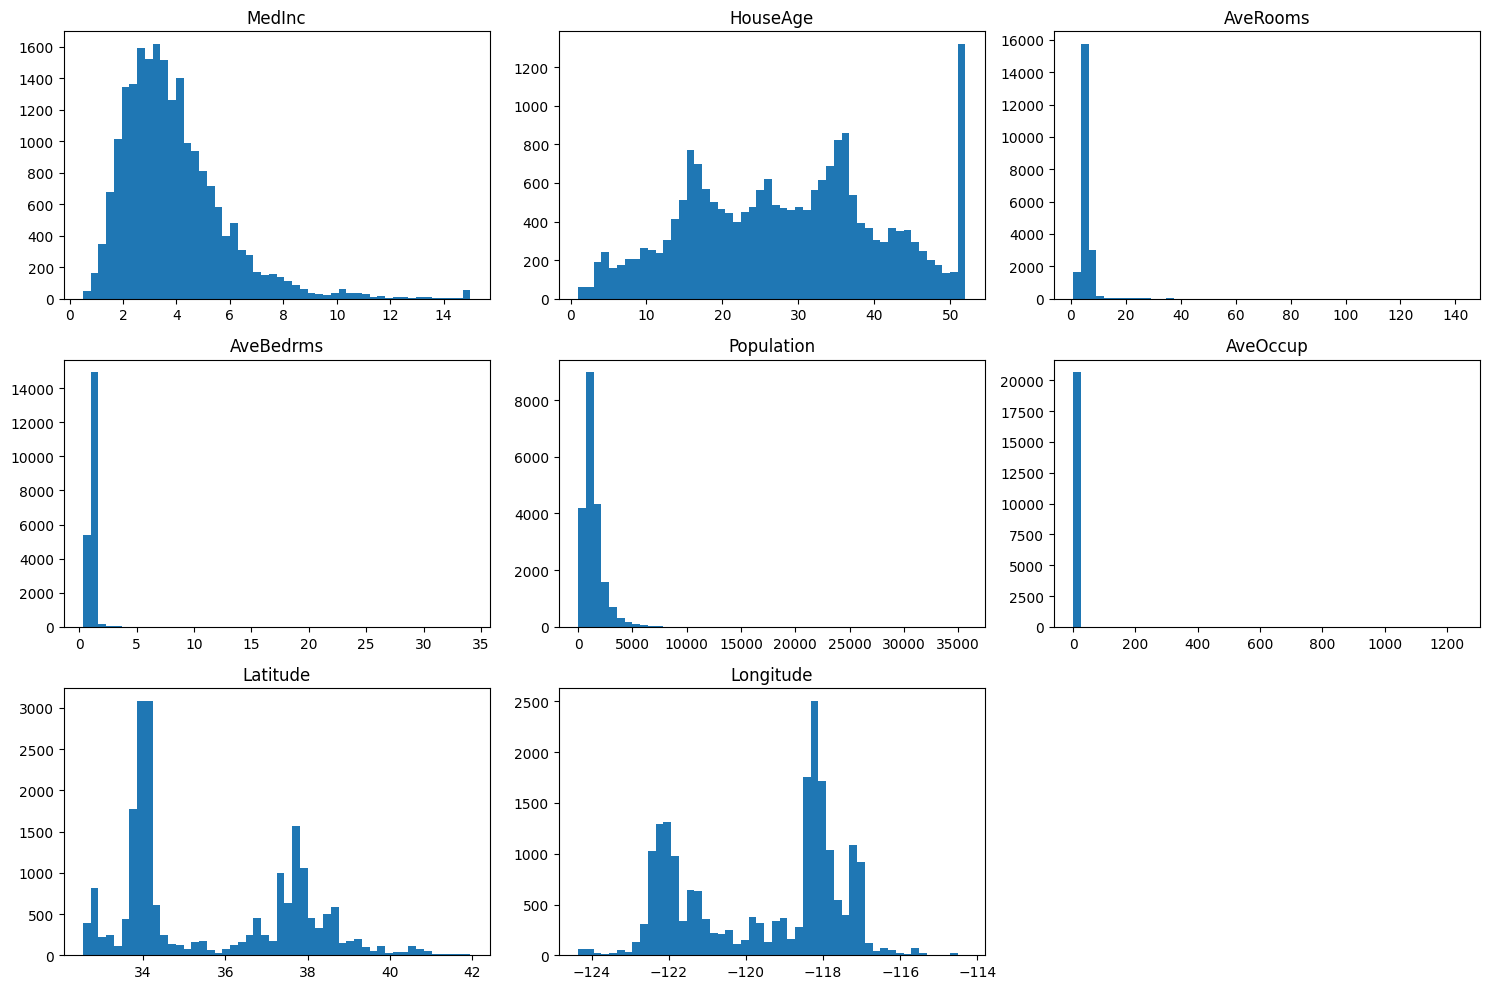

cell_content.py:13:32: W291 trailing whitespace
cell_content.py:20:32: W291 trailing whitespace
cell_content.py:21:33: W291 trailing whitespace
cell_content.py:22:37: W291 trailing whitespace



In [22]:
housing = fetch_california_housing()
df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['MedHouseVal'] = housing.target
df_housing['TXPRM'] = df_housing['MedInc'] / df_housing['AveRooms']
df_housing['TXLSTAT'] = df_housing['MedInc'] / df_housing['Population']
plt.figure(figsize=(15, 10))
for i, column in enumerate(housing.feature_names, 1):
    plt.subplot(3, 3, i)
    plt.hist(df_housing[column], bins=50)
    plt.title(column)
plt.tight_layout()
plt.show()
fig = px.scatter_3d(df_housing,
                    x='TXPRM',
                    y='MedHouseVal',
                    z='AveRooms',
                    color='Population',
                    title='3D Scatter Plot: TXPRM vs MedHouseVal')
fig.show()
fig = px.scatter_3d(df_housing,
                    x='TXLSTAT',
                    y='MedHouseVal',
                    z='MedInc',
                    color='AveRooms',
                    title='3D Scatter Plot: TXLSTAT vs MedHouseVal')
fig.show()
pep8(_ih)